# Coupled lorentz systems

for the first time ever I am trying to to understand what happens when we couple two different lorentz oscillators

Watch this [video](https://www.youtube.com/watch?v=FJn9xIW5d20&list=PLbN57C5Zdl6j_qJA-pARJnKsmROzPnO9V&index=25) to understand the math behind it 

Basiacally we are goind to model two differetn systems we will call it as driver/transmitter and receiver. 

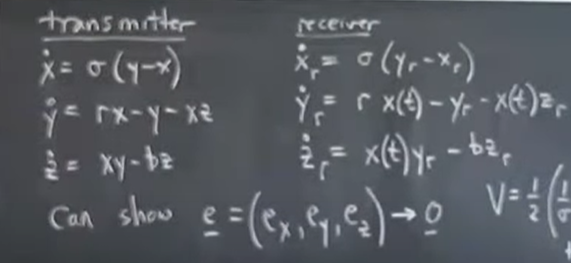

What is happenign here is that the trnasmitter is a system that is independent and is a chaotic state (for given set of parameters). It takes 

The trasmitter is a dynamical system whose equations are same as lorentz equation for agiven parameter set ($\sigma, \beta, r$). Now this transmitter evolves in time for a given initail condition. This evolution of the transmitter is independent of anyother things.

Where as the receiver is a dynamical system following the same lorentz equation dynamics but with a small change. The output of the transmitter x(t) is provided as input to the reciever in the equation for dy/dt and dz/dt

IN other words the receiver dynamics is influenced by the output of transmitter for each iteration

The goal of the current exercise is to understand the dynamics of receiver in such a coupled situaltion. More specifically we want to investigate if the receiver can be in synchronization as that of the transmitter?

We will do the following steps to find out our answer to this curious question

1. Define a transmitter object
    - pramateters $\sigma_{T}, \beta_{T}, \rho_{T}$
    - system state variables $x_{T}, y_{T}, z_{T}$
    - System dynamical rule as a function
        - input: $x_{T,n}, y_{T,n}, z_{T,n}$
        - output: $x_{T,n+1}, y_{T,n+1}, z_{T,n+1}$



2. Define a receiver object
    - pramateters $\sigma_{R}, \beta_{R}, \rho_{R}$
    - system state variables $x_{R}, y_{R}, z_{R}$
    - System dynamical rule as a function
        - input: $x_{T,n+1}, x_{R,n}, y_{R,n}, z_{R,n}$
        - output: $x_{R,n+1}, y_{R,n+1}, z_{R,n+1}$

In [3]:
%pylab inline
import plotly.offline as pyo
import plotly.express as px
from ipywidgets import widgets, interactive_output, interact
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from IPython.display import display

Populating the interactive namespace from numpy and matplotlib


In [4]:
# Import the necessaries libraries
import plotly.offline as pyo
import plotly.graph_objs as go
# Set notebook mode to work in offline
pyo.init_notebook_mode()

In [72]:
def plot_3D(x,y,z):
    fig = go.Figure(data=[go.Scatter3d(x=x,
                                        y=y,
                                        z=z,
                                        mode='markers',
                                        marker=dict(size=3,color=[i for i in range(len(x))]),
                                            )])
    fig.show()

In [268]:
def plot_timeseries(tx,rx,ex):
    
    
    fig = go.Figure()

    fig.add_trace(go.Scatter(x=[i for i in range(len(tx))], y=tx,
                            mode='markers',name='transmitter', marker=dict(size=2)))
    fig.add_trace(go.Scatter(x=[i for i in range(len(tx))], y=rx,
                            mode='markers', name='reciver',marker=dict(size=2)))
    fig.add_trace(go.Scatter(x=[i for i in range(len(tx))], y=ex,
                            mode='markers', name='difference',marker=dict(size=2)))
    fig.show()

In [361]:
class Transmitter(object):
    
    def __init__(self,sigma,rho,beta,X0,Y0,Z0):
        
        # system parameters
        self.sigma   = sigma
        self.rho     = rho
        self.beta    = beta
        
        # initiate system variables
        self.X      = X0
        self.Y      = Y0
        self.Z      = Z0
        
    def update_state(self,delta_t,beta):
        self.beta    = beta
        
        ## Governing differential equations
        # X rate
        self.X  = self.X + delta_t*(self.sigma*(self.Y-self.X)) 
        # Y rate
        self.Y  = self.Y + delta_t*(self.X*(self.rho-self.Z)-self.Y)  
        # Z rate
        self.Z  = self.Z + delta_t*(self.X*self.Y-self.beta*self.Z) 
        
        return self

In [362]:
class Receiver(object):
    
    def __init__(self,sigma,rho,beta,X0,Y0,Z0):
        
        # system parameters
        self.sigma   = sigma
        self.rho     = rho
        self.beta    = beta
        
        # initiate system variables
        self.X      = X0
        self.Y      = Y0
        self.Z      = Z0
        
    def update_state(self,Transmitter_X, delta_t):
        
        ## Governing differential equations
        # X rate
        self.X  = self.X + delta_t*(self.sigma*(self.Y-self.X)) 
        # Y rate
        self.Y  = self.Y + delta_t*(Transmitter_X*(self.rho-self.Z)-self.Y)
        # Z rate
        self.Z  = self.Z + delta_t*(Transmitter_X*self.Y-self.beta*self.Z) 
        
        return self

In [363]:
beta

<function RandomState.beta>

In [376]:
delta_t = 0.01
n = 10000
Ttr = 8000
Tx,Ty,Tz, = [],[],[]
Rx,Ry,Rz, = [],[],[]

transmitter = Transmitter(10,28,8/3,0.1,0.1,0.3)
receiver = Receiver(10,28,8/3,2.2,20.2,0.4)

for i in range(n):
    transmitter =  transmitter.update_state(delta_t,8/3+np.sin(i))
    Tx.append(transmitter.X)
    Ty.append(transmitter.Y)
    Tz.append(transmitter.Z)
    
    receiver = receiver.update_state(transmitter.X,delta_t)
    Rx.append(receiver.X)
    Ry.append(receiver.Y)
    Rz.append(receiver.Z)
    
Tx = Tx[Ttr:]
Ty = Ty[Ttr:]
Tz = Tz[Ttr:]
Rx = Rx[Ttr:]
Ry = Ry[Ttr:]
Rz = Rz[Ttr:]


    
#error
Ex = np.array(Rx)-np.array(Tx)
Ey = np.array(Ry)-np.array(Ty)
Ez = np.array(Rz)-np.array(Tz)

In [377]:
plot_timeseries(Tx,Rx,Ex)

In [378]:
plot_timeseries(Tz,Rz,30*Ez)

In [371]:
plot_3D(Tx,Ty,Tz)

In [372]:
plot_3D(Rx,Ry,Rz)

In [374]:
plot_3D(Ex,Ey,Ez)

In [373]:
fig = go.Figure(data=go.Scatter(
    x=Tx,
    y=Rx,
    mode='markers'
))

fig.show()

In [349]:
from sklearn.metrics import pairwise

In [379]:
def plot_recursion(t,X):
    '''
    function to plot recursion
    '''
    X = X.reshape(-1,1)
    plt.figure(figsize=(8,3))
    plt.subplot(1,2,1)
    plt.scatter(t,X.ravel())
    plt.subplot(1,2,2)
    plt.imshow(pairwise.pairwise_distances(X),"gray")
    plt.colorbar()
    plt.show()

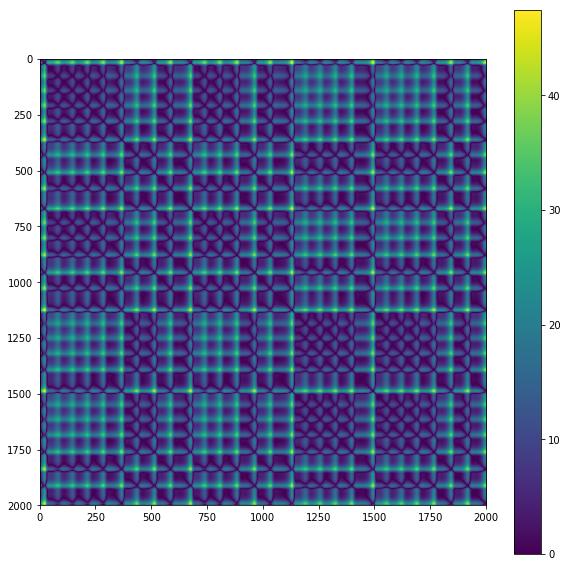

In [385]:
plt.figure(figsize=(10,10))
plt.imshow(pairwise.pairwise_distances((np.array(Ty)).reshape(-1, 1)))
plt.colorbar()
plt.show()

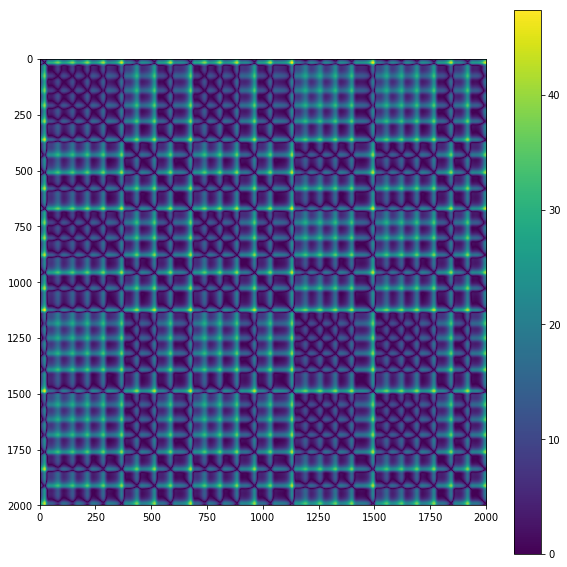

In [386]:
plt.figure(figsize=(10,10))
plt.imshow(pairwise.pairwise_distances((np.array(Ry)).reshape(-1, 1)))
plt.colorbar()
plt.show()

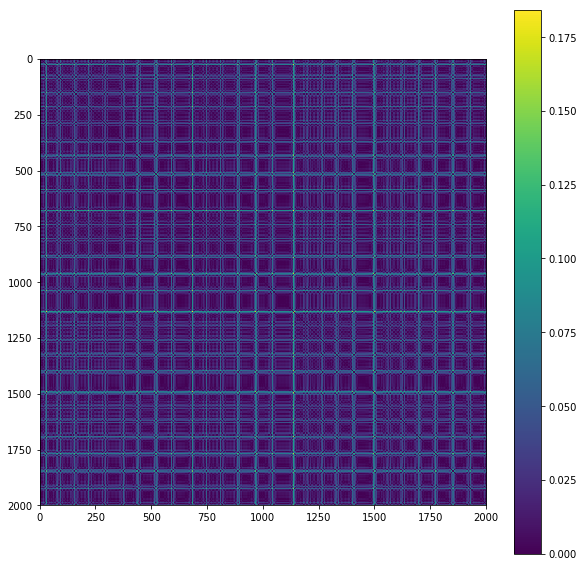

In [387]:
plt.figure(figsize=(10,10))
plt.imshow(pairwise.pairwise_distances((np.array(Ey)).reshape(-1, 1)))
plt.colorbar()
plt.show()

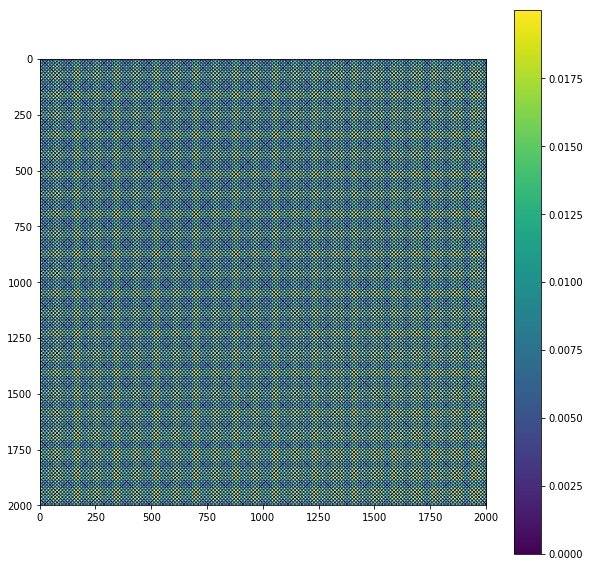

In [390]:
plt.figure(figsize=(10,10))
plt.imshow(pairwise.pairwise_distances((np.array([0.01*np.sin(i) for i in range(n)][Ttr:])).reshape(-1, 1)))
plt.colorbar()
plt.show()

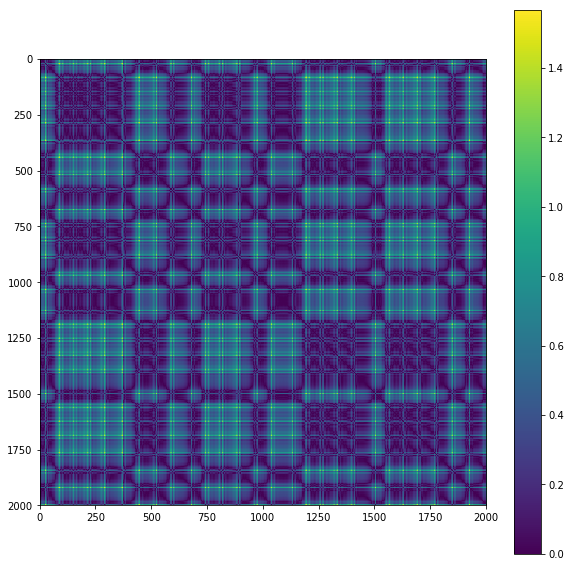

In [389]:
plt.figure(figsize=(10,10))
plt.imshow(pairwise.pairwise_distances((np.array(Ex)).reshape(-1, 1)-np.array([0.01*np.sin(i) for i in range(n)][Ttr:])))
plt.colorbar()
plt.show()